In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization, Embedding, Bidirectional, Conv1D, MaxPool1D, Flatten
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import optimizers, regularizers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
#read the dataset
df = pd.read_csv("/Users/charottamaoshmar/Documents/UOW/CSCI316 Big Data Mining/Labs/Project'/YearPredictionMSD.txt", header = None)

In [3]:
df.shape

(515345, 91)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64

In [6]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
61    float64
62    float64
63    float64
64    float64
65    float64
66    float64
67    float64
68    float64
69    float64
70    float64
71    float64
72    float64
73    float64
74    float64
75    float64
76    float64
77    float64
78    float64
79    float64
80    float64
81    float64
82    float64
83    float64
84    float64
85    float64
86    float64
87    float64
88    float64
89    float64
90    float64
Length: 91, dtype: object

In [7]:
#for easy normalization and reshaping later
x = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

In [8]:
x.shape

(515345, 90)

In [9]:
y.shape

(515345,)

In [10]:
#normalize values between 0 and 1
x = (x - x.min()) / (x.max() - x.min())

In [11]:
x_train = x[:463715]
x_test = x[463715:]
y_train = y[:463715]
y_test = y[463715:]

In [12]:
y_test.shape

(51630,)

In [13]:
#optimizer is declared externally so learning rate can be specified
opt = optimizers.Adam(lr=0.1)

In [14]:
#now let's build the MLP model
mlp_model = Sequential()

mlp_model.add(Dense(64, input_dim=90, \
                    kernel_regularizer=\
                    regularizers.l2(0.01),\
                    activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(1, activation='linear'))

In [15]:
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [16]:
mlp_model.compile(loss='mean_squared_error', \
                  optimizer=opt, metrics=['mse'])

In [17]:
history = mlp_model.fit(x_train, y_train, \
                        epochs=50, batch_size=512, \
                        verbose=2, \
                        validation_data = [x_test, y_test])

Train on 463715 samples, validate on 51630 samples
Epoch 1/50
 - 3s - loss: 525924.3664 - mse: 525917.5000 - val_loss: 264288.7877 - val_mse: 264285.9688
Epoch 2/50
 - 3s - loss: 343660.4961 - mse: 343658.5625 - val_loss: 137212.9762 - val_mse: 137211.6406
Epoch 3/50
 - 3s - loss: 306765.5080 - mse: 306764.2500 - val_loss: 66489.5773 - val_mse: 66488.6172
Epoch 4/50
 - 3s - loss: 274050.8997 - mse: 274049.9688 - val_loss: 50580.0948 - val_mse: 50579.2617
Epoch 5/50
 - 3s - loss: 244458.9210 - mse: 244458.2500 - val_loss: 26853.7280 - val_mse: 26852.9844
Epoch 6/50
 - 3s - loss: 217224.8082 - mse: 217224.1250 - val_loss: 17741.9215 - val_mse: 17741.2422
Epoch 7/50
 - 3s - loss: 184457.2547 - mse: 184456.6406 - val_loss: 13747.8481 - val_mse: 13747.2744
Epoch 8/50
 - 3s - loss: 164887.9701 - mse: 164887.4531 - val_loss: 12596.5430 - val_mse: 12596.0967
Epoch 9/50
 - 3s - loss: 147053.7739 - mse: 147053.3438 - val_loss: 13133.3228 - val_mse: 13133.0117
Epoch 10/50
 - 3s - loss: 129662.709

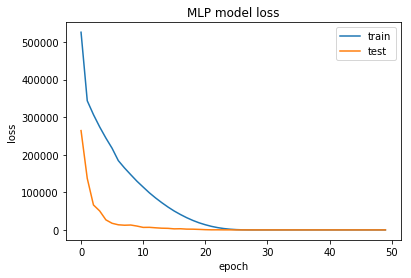

In [18]:
#Plotting of our MLP model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
type(x_train)

numpy.ndarray

In [15]:
type(y_test)

numpy.ndarray

In [16]:
#reshape so it can fit in Conv1D, which is necessary for CNN
x_train = x_train.reshape(463715, 90, 1)
x_test = x_test.reshape(51630, 90, 1)

In [17]:
#shape has been altered
x_train.shape

(463715, 90, 1)

In [27]:
#let's build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=5, \
                     input_shape=(90,1), \
                     activation='relu'))
cnn_model.add(Conv1D(filters=32, kernel_size=5, \
                     activation='relu'))
cnn_model.add(MaxPool1D(pool_size=3))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(1, activation = 'linear'))

In [28]:
cnn_model.compile(loss = 'mean_squared_error', \
                  optimizer = opt, metrics = ['mse'])

In [29]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 86, 32)            192       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 82, 32)            5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 864)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               110720    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [30]:
cnn_history = cnn_model.fit(x_train, y_train, \
                            epochs=5, batch_size=512, \
                            verbose=2, \
                            validation_data = [x_test, y_test])

Train on 463715 samples, validate on 51630 samples
Epoch 1/5
 - 46s - loss: 42603330.2966 - mse: 42603384.0000 - val_loss: 177170.9421 - val_mse: 177170.9531
Epoch 2/5
 - 49s - loss: 829775.1905 - mse: 829774.9375 - val_loss: 156185.2244 - val_mse: 156185.2188
Epoch 3/5
 - 38s - loss: 801154.3394 - mse: 801154.5000 - val_loss: 157676.5862 - val_mse: 157676.5781
Epoch 4/5
 - 38s - loss: 754433.1244 - mse: 754433.1250 - val_loss: 120730.4459 - val_mse: 120730.4453
Epoch 5/5
 - 38s - loss: 663834.5601 - mse: 663834.7500 - val_loss: 106873.6790 - val_mse: 106873.6484


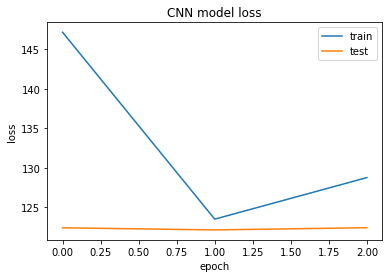

In [23]:
#Plotting of our CNN model 
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()